# Ayudantía computacional tarea 1 Flujo en Redes - 2020-1
### Ayudante: Pablo Seisdedos: pcseisdedos@uc.cl

### Contenidos:
* Instalación de librerías
* Simulación 
* Lectura de archivos
* Estructuras de datos built-in en python
* Modelar redes con POO
* Graficar

### Instalación de librerías

La ventaja de python es que existen muchas librerías externas que permiten ahorrar bastante código a la hora de programar, sin embargo, la mayoría de estas librerías no vienen por defecto en python y por lo tanto deben ser instaladas, para esto se usa la herramienta [**pip** ](https://pip.pypa.io/en/stable/). Para esto deben agregar pip a las variables de entorno para que sea reconocido como comando.

Luego para poder instalar librerías deben abrir la cmd (o terminal) y ejecutar el comando `pip install nombre_libreria`. Existen distintas versiones de python y en algunas cambia el comando para instalar, para verificar la versión de python que tienen pueden ejecutar en la cmd `python --version`, a continuación se encuentran algunas opciones de instalación:
* `pip install`
* `python -m pip install`
* `python3 -m pip install`
* `py -m pip install`
* `pip3 install`
* `pip36 install`

Si quieren instalar librerías en jupyter deben anteponer `!` antes del comando pip, por ejemplo:
`!pip install matplotlib`

### Simulación en python

Las simulaciones corresponden a modelos que representan la realidad y nos sirven para analizar el comportamiento de un sistema sin la necesidad de implementarlo realmente. Esto es útil dado que en algunos casos implementar el sistema en la realidad es muy costoso o tiene grandes riesgos, existen modelos simples que se pueden modelar de forma analítica, pero hay otros mas complejos que requieren simulaciones computacionales para poder entenderlos y ver su funcionamiento bajo distitnas situaciones.

Existen dos formas principales de simular en Python:
1. Simulación sincrona: En este tipo de simulación se **itera por día**.
1. Simulación basada en eventos discretos (DES): En este tipo de simulación se **itera por eventos**.

**Simulación sincrona**

```python
Mientras el tiempo simulación no termine
    aumentar tiempo en una unidad
    si ocurren eventos en este intervalo de tiempo: 
        simular los eventos
```        
   
        
**Simulación DES**


```python
Mientras la lista de eventos no esté vacía y el tiempo de simulación no termine
    quitar el primer elemento de la lista de eventos
    avanzar el tiempo de simulación al tiempo de este evento
    simular el evento
```


In [4]:
import time
from collections import deque
from random import choice, randrange, random, expovariate, randint, uniform, seed

In [5]:
# Author: Karim Pichara y Christian Pieringer
# Libro: Advanced computer programming in python
# link: https://advancedpythonprogramming.github.io/
# Cap 8


class Vehiculo:
    # Esta clase modela los vehiculos que llegan al taller
    
    def __init__(self, vehiculos):
        # Cuando se crea un nuevo vehículo se escoge aleatoriamente el tipo de vehículo
        # entrante y su tiempo promedio de atención
        self.tipo_vehiculo = choice(list(vehiculos))
        self._tiempo_revision = round(expovariate(vehiculos[self.tipo_vehiculo]) + 0.5)
    
    @property
    def tiempo_revision(self):
        return self._tiempo_revision
    
    @tiempo_revision.setter
    def tiempo_revision(self, valor):
        self._tiempo_revision = valor
        
        
class Taller:
    # Esta clase modela la linea de revision en el taller
    def __init__(self):
        self.tarea_actual = None
        self.tiempo_revision = 0

    @property
    def ocupado(self):
        return self.tarea_actual != None

    def proximo_auto(self, vehiculo):
        self.tarea_actual = vehiculo
        self.tiempo_revision = vehiculo.tiempo_revision
        time.sleep(0.2)
        print('[PLANTA] Atendiendo {0} con un tiempo promedio de {1} min'.format( \
                self.tarea_actual.tipo_vehiculo, self.tiempo_revision))
        
    def tick(self):
        if self.tarea_actual != None:
            self.tiempo_revision -= 1
            if self.tiempo_revision <= 0:
                time.sleep(0.2)
                print('[PLANTA] termina revision de {}'.format(self.tarea_actual.tipo_vehiculo))
                self.tarea_actual = None

        
def llega_nuevo_auto():
    # Esta funcion modela si llega o no un auto nuevo a la cola. 
    # Se muestrea de una distribución de probabilidad uniforme. El método retorna
    # True si el valor entregado por la función random es mayor a un valor dado.
    return random() >= 0.8


def revision_tecnica(max_tiempo, vehiculos):
    # Esta funcion maneja el proceso o servicio de revision en el taller
   
    planta_revision = Taller() # se crea una planta de revisión
    cola_revision = deque()  # cola de revision vacia
    tiempo_espera = [] # tiempos de espera

    # Se define el ciclo de simulación al máximo tiempo en minutos difinido, 
    # donde en cada instante t se evelúa si llega un nuevo vehículo
    # a la cola de revisión

    for t in range(max_tiempo):     
        if llega_nuevo_auto():
            cola_revision.append(Vehiculo(vehiculos))
            time.sleep(0.2)
            print('[COLA] llega {} en tiempo de simulacion t={} min. Hay {} vehiculos en la cola.'.format(
                    cola_revision[-1].tipo_vehiculo, t, len(cola_revision)))
                 
        if (not planta_revision.ocupado) and (len(cola_revision) > 0):
            
            # se extrae el proximo auto en la cola de atención       
            ac_auto = cola_revision.popleft()
            tiempo_espera.append(ac_auto.tiempo_revision)
            planta_revision.proximo_auto(ac_auto)
        
        # descuenta un tick de tiempo al auto en espera
        planta_revision.tick()

    tiempo_promedio = sum(tiempo_espera) / len(tiempo_espera)
    tiempo_total = sum(tiempo_espera)

    print('\nEstadísticas:')
    print('Tiempo promedio de espera {0:6.2f} min.'.format(tiempo_promedio))
    print('Tiempo total de atención de la planta fue de {0:6.2f} min'.format(sum(tiempo_espera)))
    print('Total de vehículos atendidos: {0}'.format(len(tiempo_espera)))

**Ejecutamos la simulación**

In [6]:
if __name__ == '__main__':
    # define los tipos de vehículos y su tiempo de atención promedio
    vehiculos = {'moto': 1.0/8, 'auto': 1.0/15, 'camioneta': 1.0/20} 
    maximo_tiempo = 80
    revision_tecnica(maximo_tiempo, vehiculos)

[COLA] llega auto en tiempo de simulacion t=3 min. Hay 1 vehiculos en la cola.
[PLANTA] Atendiendo auto con un tiempo promedio de 15 min
[COLA] llega camioneta en tiempo de simulacion t=6 min. Hay 1 vehiculos en la cola.
[COLA] llega auto en tiempo de simulacion t=8 min. Hay 2 vehiculos en la cola.
[COLA] llega moto en tiempo de simulacion t=12 min. Hay 3 vehiculos en la cola.
[PLANTA] termina revision de auto
[COLA] llega auto en tiempo de simulacion t=18 min. Hay 4 vehiculos en la cola.
[PLANTA] Atendiendo camioneta con un tiempo promedio de 19 min
[COLA] llega auto en tiempo de simulacion t=34 min. Hay 4 vehiculos en la cola.
[PLANTA] termina revision de camioneta
[PLANTA] Atendiendo auto con un tiempo promedio de 1 min
[PLANTA] termina revision de auto
[PLANTA] Atendiendo moto con un tiempo promedio de 4 min
[COLA] llega moto en tiempo de simulacion t=40 min. Hay 3 vehiculos en la cola.
[COLA] llega camioneta en tiempo de simulacion t=41 min. Hay 4 vehiculos en la cola.
[PLANTA] te

In [7]:
from collections import deque
from random import expovariate, randint, uniform, seed
from datetime import datetime, timedelta
import time

In [8]:
# Author: Karim Pichara y Christian Pieringer
# Libro: Advanced computer programming in python
# link: https://advancedpythonprogramming.github.io/
# Cap 8

class Vehiculo:
    # Esta clase modela los autos que llegan a la revision
    def __init__(self, tiempo_llegada=0):
        self.tipo_vehiculo = choice(['moto', 'camioneta', 'auto'])
        self.tiempo_llegada = tiempo_llegada
   
    def __repr__(self):
        return 'Tipo vehiculo: {0}'.format(self.tipo_vehiculo)
    
class Taller:
    
    def __init__(self, tipos):
        self.tarea_actual = None
        self.tiempo_revision = 0
        self.tipos = tipos
    
    def pasar_vehiculo(self, vehiculo):
        self.tarea_actual = vehiculo
        # Creamos un tiempo de atención aleatorio
        self.tiempo_revision = round(expovariate(self.tipos[vehiculo.tipo_vehiculo]) + 0.5)  

    @property    
    def ocupado(self):
        return self.tarea_actual != None
    
    
class Simulacion:
    # Esta clase implemeta la simulación. También se puede usar una función como en el caso anterior.
    # Se inicializarn todas las variables utilizadas en la simulación.

    def __init__(self, tiempo_maximo, tasa_llegada, tipos):
        self.tiempo_maximo_sim = tiempo_maximo
        self.tasa_llegada = tasa_llegada
        self.tiempo_simulacion = 0
        self.tiempo_proximo_auto = 0
        self.tiempo_atencion = 0
        self.tiempo_espera = 0
        self.planta = Taller(tipos)
        self.cola_espera = deque()
        self.vehiculos_atendidos = 0
    
    def proximo_auto(self, tasa_llegada):
        # un auto llega cada 5 minutos
        self.tiempo_proximo_auto = self.tiempo_simulacion + round(expovariate(tasa_llegada) + 0.5) 
   
    def run(self):
        # Este método ejecuta la simulación de la revisión y la cola de espera
        # se estima aleatoreamente la llegada de un auto a la linea de revisión
        self.proximo_auto(self.tasa_llegada)

        while self.tiempo_simulacion < self.tiempo_maximo_sim:
            
            # Primero revisamos el evento actual. Si la planta está vacía o 
            # si la planta está ocupada, y no ha salido algún vehículo de la planta, 
            # el tiempo de simulación siempre será el tiempo de llegada de los vehículos. 
            # Cuando sale el vehículo, el tiempo de simulación debe ser el tiempo transcurrido
            # hasta esta revisión.

            if (self.planta.ocupado and self.tiempo_proximo_auto < self.tiempo_atencion) or (not self.planta.ocupado):
                self.tiempo_simulacion = self.tiempo_proximo_auto
                
            else:
                self.tiempo_simulacion = self.tiempo_atencion
                
            time.sleep(0.2)
            print('[SIMULACION] tiempo: {0} min'.format(self.tiempo_simulacion))
            
            if self.tiempo_simulacion == self.tiempo_proximo_auto:
                # Mientras se esté revisando un vehículo en la planta, 
                # el resto de los vehículos se sigue acumulando en la cola. Por cada
                # llegada se genera el próximo evento mediante el método próximo auto

                self.cola_espera.append(Vehiculo(self.tiempo_simulacion))                
                self.proximo_auto(self.tasa_llegada)
                time.sleep(0.2)
                print('[COLA] Llega {0} en tiempo simulación: {1} min.'.format(
                        self.cola_espera[-1].tipo_vehiculo, self.tiempo_simulacion))
                
                if (not self.planta.ocupado) and (len(self.cola_espera) > 0):
                    # Si la planta está desocupada y queden elementos en la cola de espera, 
                    # el siguiente vehículo se retira de la cola y entra a la planta. 
                    # Al entrar se le asigna aleatoriamente el tiempo de atención y se genera 
                    # el instante estimado de término de la revisión

                    proximo_vehiculo = self.cola_espera.popleft()  # sacamos un auto en la cola de atencion
                    self.planta.pasar_vehiculo(proximo_vehiculo)   # y lo pasamos a la planta
                    
                    # nuevo tiempo de revisión
                    self.tiempo_atencion = self.tiempo_simulacion + self.planta.tiempo_revision   
                    time.sleep(0.2)
                    print('[PLANTA] Entra {0} con un tiempo de atencion esperado de {1} min.'.\
                          format(self.planta.tarea_actual.tipo_vehiculo, self.planta.tiempo_revision))

            else:
                
                # Cuando el tiempo de simulación es igual al tiempo transcurrido
                # durante la revisión se retira el vehículo del taller y el siguiente
                # vehículo puede entrar a la atención
                time.sleep(0.2)
                print('[PLANTA] Sale: {} a los {} min.'.format(self.planta.tarea_actual.tipo_vehiculo, self.tiempo_simulacion))
                
                self.tiempo_espera += self.tiempo_simulacion - self.planta.tarea_actual.tiempo_llegada
                self.planta.tarea_actual = None
                self.vehiculos_atendidos += 1
                

        print('\nEstadísticas:')
        print('Tiempo total atención {0} min.'.format(self.tiempo_atencion))
        print('Total de vehículos atendidos: {0}'.format(self.vehiculos_atendidos))
        print('Tiempo promedio de espera {0} min.'.format(round(self.tiempo_espera/self.vehiculos_atendidos)))

**Ejecutamos la simulación**

In [9]:
if __name__ == '__main__':
    # En este ejemplo inicializamos la simulación con 50 min como tiempo máximo.
    # Definimos la tasa de llegada de los vehículos en un vehícuo cada 5 minutos. 
    # También definimos un diccionario con los tipos de vehículos que atenderá la planta 
    # y la tasa promedio de atención para cada tipo de vehículo. 
    # Experimente con tiempos mayores y otras tasas de atención y llegada. 
    
    vehiculos = {'moto': 1.0/8, 'auto': 1.0/15, 'camioneta': 1.0/20}
    tasa_llegada_vehiculos = 1/5
    s = Simulacion(50, tasa_llegada_vehiculos, vehiculos) 
    s.run()

[SIMULACION] tiempo: 2 min
[COLA] Llega auto en tiempo simulación: 2 min.
[PLANTA] Entra auto con un tiempo de atencion esperado de 1 min.
[SIMULACION] tiempo: 3 min
[PLANTA] Sale: auto a los 3 min.
[SIMULACION] tiempo: 11 min
[COLA] Llega camioneta en tiempo simulación: 11 min.
[PLANTA] Entra camioneta con un tiempo de atencion esperado de 69 min.
[SIMULACION] tiempo: 21 min
[COLA] Llega auto en tiempo simulación: 21 min.
[SIMULACION] tiempo: 30 min
[COLA] Llega moto en tiempo simulación: 30 min.
[SIMULACION] tiempo: 32 min
[COLA] Llega auto en tiempo simulación: 32 min.
[SIMULACION] tiempo: 36 min
[COLA] Llega camioneta en tiempo simulación: 36 min.
[SIMULACION] tiempo: 37 min
[COLA] Llega auto en tiempo simulación: 37 min.
[SIMULACION] tiempo: 40 min
[COLA] Llega moto en tiempo simulación: 40 min.
[SIMULACION] tiempo: 45 min
[COLA] Llega moto en tiempo simulación: 45 min.
[SIMULACION] tiempo: 62 min
[COLA] Llega camioneta en tiempo simulación: 62 min.

Estadísticas:
Tiempo total ate

### Lectura de archivos

* Muchas veces vamos a tener que trabajar con bases de datos que no tenemos cargadas en el archivo en donde se tiene el código, para solucionar esto podemos importar los datos directamente desde python.
* Existen distintos formatos en los que pueden estar las bases de datos, los más típicos para efectos de bases de datos con bajo nivel de especificación y peso son txt y csv. Para estos últimos existen librerías especializadas que son útiles para la lectura de archivos.

#### Ejemplo: 
* Para mostrar la lectura de datos vamos a ocupar un pequeño ejemplo que consiste en un mapa en donde existen casillas ocupadas (representadas por una X) y casillas libres (representadas por una O). El objetivo es construir un grafo en que se conecten las casillas vacías con las casillas adyacentes que se encuentren vacías, esto corresponde a un grafo no dirigido.

* En este caso la base de datos de ejemplo se encuentra en un archivo txt y contiene la información en un formato super sencillo.

La base de datos básicamente cuenta con `X` y `O` que representan si una celda en un tablero se encuentra ocupada (X) o vacía (O).


Ejemplo de base de datos:

```python
XOXOO
OOXOX
XOOOO
```




In [15]:
def leer_datos(path):
    with open(path,"r", encoding = "UTF-8") as archivo:
        matriz = [ i.strip("\n") for i in archivo.readlines()] # i.strip("\n") para quitar los enter en cada linea
        return matriz

In [16]:
matriz = leer_datos("mapa_1.txt")

FileNotFoundError: [Errno 2] No such file or directory: 'mapa_1.txt'

In [17]:
matriz

NameError: name 'matriz' is not defined

### Estructuras de datos built-in en python

1. Actualmente se requiere almacenar la información con la que se trabaja de forma eficiente, para esto existen datos de tipo básico (int, float, bool, etc) que cumplen esa función, pero aún se requieren otras funcionalidades que estos datos no poseen. Para esto se ocupan estructuras de datos que corresponden a formas de guardar la información diseñadas para agrupar, almacenar o acceder a la información de forma eficiente.

1. Las estructuras de datos involucran un alto nivel de abstracción y por lo tanto es posible establecer una clara y directa relación con la programación orientada a objetos (POO). El uso de cada tipo de estructura de datos tiene relación directa con el contexto de aplicación, como también con el diseño y eficiencia alcanzada por los algoritmos. Es decir, la elección adecuada de la estructura de datos es fundamental para desarrollar un buen software.

"*El saber que estructura de datos ocupar y en que momento o contexto hacerlo, hace la diferencia entre un programador y un buen programador*". 
Hans Löbel

Existen 4 estructuras de datos fundamentales en python que ofrecen una gran variedad de alternativas y funcionalidades que podemos aprovechar a la hora de programar, estas son las siguientes:
1. Listas: (**list**, puede ser modelado como colas o stacks) para mas información [ver documentacion](https://docs.python.org/3/tutorial/datastructures.html)
1. Tuplas: (**tuple**) para mas información [ver documentacion](https://docs.python.org/3/c-api/tuple.html)
1. Conjuntos: (**set**) para mas información [ver documentacion](https://docs.python.org/3/c-api/set.html)
1. Diccionarios: (**dict**) para mas información [ver documentacion](https://docs.python.org/3/tutorial/datastructures.html#dictionaries)

Links de interés:
* https://github.com/IIC2115/Syllabus/tree/master/Material%20de%20clases/Cap%C3%ADtulo%202
* https://jpt-pynotes.readthedocs.io/en/latest/more-types.html
* https://docs.python.org/3/tutorial/datastructures.html
* https://stackoverflow.com/questions/28845284/add-vs-update-in-set-operations-in-python

#### Listas y tuplas

Estas estructuras están basadas en un ordenamiento secuencial de los elementos, según como son ingresados en la estructura. Soportan indexación de los elementos de la forma secuencia[índice]. El índice parte desde 0 hasta el largo de la secuencia - 1. Tienen la gran ventaja de que permiten hacer cortes (o slices) y son iterables, es decir, se pueden recorrer.

La gran diferencia entre listas y tuplas es que las listas son estructuras de datos **MUTABLES** mientras que las tuplas son **INMUTABLES**, esto significa que las listas se pueden modificar pero las tuplas no. La principal ventaja de la inmutabilidad es que pueden ser usadas como valor de mapeo o llave en estructuras basadas en hashing, como son los diccionarios que veremos más adelante.

Forma general de hacer slicing en Python:

* `a[start : end]`: retorna los elementos desde start hasta end-1.
* `a[start:]`: retorna los elementos desde start hasta el final del arreglo.
* `a[:end]`: retorna los elementos desde el principio hasta end-1.
* `a[:]`: crea una copia (shallow) del arreglo completo. Es decir, el arreglo retornado está en una nueva dirección de memoria, pero los elementos en el arreglo están hace referencia a la dirección de memoria a los elemenos del arreglo original.
* `a[start : end : step]`: retorna los elementos desde start hasta no pasar end, en pasos de a step.
* `a[-1]`: retorna el último elemento en el arreglo.
* `a[-n:]`: # últimos n elementos en el arreglo.
* `a[:-n]`: retorna todos los elementos del arreglo menos los últimos n elementos.

In [18]:
numeros = [6, 7, 2, 4, 10, 20, 25] # Lista
print(numeros[2:6])

data = (400, 20, 1, 4, 10, 11, 12, 500) # Tupla
print(data[1:3])

[2, 4, 10, 20]
(20, 1)


#### Conjuntos (sets)

Un set es un contenedor útil cuando tenemos que asegurar que los objetos no estén repetidos en la estructura de datos, ya que la estructura se encarga de mantener sólo una copia de cada elemento, a pesar de que lo agreguemos nuevamente (tal como en la unión de conjuntos). Los sets no tienen un orden particular, por lo que no son indexables pero si son iterables.

En Python un set puede contener cualquier objeto hashable, es decir, objetos que pueden ser usados como llaves en diccionarios, y que por lo mismo deben ser inmutables. Se pueden agregar o eliminar elementos a un set ocupando add y remove, también existen otros métodos que pueden buscar en la documentación

In [19]:
mis_artistas = {'Hozier', 'Opeth', 'Ellie Goulding', 'Mark Ronson', 'Taylor Swift'}
artistas_album = {'Maroon 5', 'Taylor Swift', 'Amy Wadge'}

print("Todos: {}".format(mis_artistas.union(artistas_album)))
print("Ambos: {}".format(artistas_album.intersection(mis_artistas)))

Todos: {'Hozier', 'Mark Ronson', 'Opeth', 'Ellie Goulding', 'Amy Wadge', 'Maroon 5', 'Taylor Swift'}
Ambos: {'Taylor Swift'}


#### Diccionarios

1. Los diccionarios corresponden a estructuras de datos orientadas a la asociación de pares de elementos mediante una relación: llave-valor. Esta relación permite que la búsqueda de los elementos se realice de forma eficiente mediante el uso de la llave, quien indica la posición de memoria donde está contenido su valor asociado.
1. En Python los diccionarios se escriben con {}. Se debe especificar la llave y el valor, asociadas mediante `:`. Las llaves en los diccionarios pueden ser cualquier tipo de variable **inmutable**, las llaves deben ser únicas de lo contrario los elementos se sobreescriben.
1. Acceder a un elemento del diccionario teniendo la llave es una operación de orden 1, por lo tanto son muy eficientes si se implementan de forma correcta.

In [20]:
monedas_por_pais = {"Chile": "Peso", "España": "Euro", "Perú": "Sol", "Holanda": "Euro"}
def imprime_monedas():
    for pais, moneda in monedas_por_pais.items():
        print("El país {} ocupa la moneda {}.".format(pais, moneda))
imprime_monedas()

El país Chile ocupa la moneda Peso.
El país España ocupa la moneda Euro.
El país Perú ocupa la moneda Sol.
El país Holanda ocupa la moneda Euro.


In [21]:
monedas_por_pais["Estados Unidos"] = "Dolar"
monedas_por_pais.update({"Brasil": "Real", "Japón": "Yen"})
imprime_monedas()

El país Chile ocupa la moneda Peso.
El país España ocupa la moneda Euro.
El país Perú ocupa la moneda Sol.
El país Holanda ocupa la moneda Euro.
El país Estados Unidos ocupa la moneda Dolar.
El país Brasil ocupa la moneda Real.
El país Japón ocupa la moneda Yen.


In [22]:
monedas_por_pais["Chile"] = "Peso chileno"
imprime_monedas()

El país Chile ocupa la moneda Peso chileno.
El país España ocupa la moneda Euro.
El país Perú ocupa la moneda Sol.
El país Holanda ocupa la moneda Euro.
El país Estados Unidos ocupa la moneda Dolar.
El país Brasil ocupa la moneda Real.
El país Japón ocupa la moneda Yen.


In [23]:
del (monedas_por_pais["Brasil"])
eliminado = monedas_por_pais.pop("Holanda")
imprime_monedas()
print("\nSe ha eliminado {} del diccionario de monedas".format(eliminado))

El país Chile ocupa la moneda Peso chileno.
El país España ocupa la moneda Euro.
El país Perú ocupa la moneda Sol.
El país Estados Unidos ocupa la moneda Dolar.
El país Japón ocupa la moneda Yen.

Se ha eliminado Euro del diccionario de monedas


#### Defaultdicts

1. Los defaultdict a diferencia de las otras estructuras de datos no vienen cargados en python, sino que se deben importar de la librería collections (que es interna de python, es decir, no requiere instalación).
1. Los defaultdicts son escencialmente diccionarios que permiten agregar un valor por defecto a los valores de las llaves que no existen en el diccionario, de esta forma se evita que el código arroje un error al tratar de acceder al valor de una llave que no existe.
1. Para fijar el valor por defecto se introduce una función que retorna lo que va a guardar el diccionario para las llaves que no existe, esta función se ejecuta cada vez que se intenta acceder a una llave inexistente en el diccionario.

In [25]:
from collections import defaultdict

num_items = 0

def funcion_ej():
    return (1)

d = defaultdict(funcion_ej)

print(d['a'])
print(d['b'])
print(d['c'])
print(d['d'])
print(d['e'])

print(d)

1
1
1
1
1
defaultdict(<function funcion_ej at 0x10dffd050>, {'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 1})


In [26]:
print(d)

defaultdict(<function funcion_ej at 0x10dffd050>, {'a': 1, 'b': 1, 'c': 1, 'd': 1, 'e': 1})


In [27]:
datos = defaultdict(str)
datos.update({"Nombre": "Pablo", "Apellido": "Seisdedos"})
print("El rut de {} {} es '{}'".format(datos["Nombre"], datos["Apellido"], datos["rut"]))
print(datos)

El rut de Pablo Seisdedos es ''
defaultdict(<class 'str'>, {'Nombre': 'Pablo', 'Apellido': 'Seisdedos', 'rut': ''})


In [28]:
def funcion_ej2():
    return "NA"

datos2 = defaultdict(funcion_ej2)
datos2.update({"Nombre": "Pablo", "Apellido": "Seisdedos"})
print("El rut de {} {} es '{}'".format(datos2["Nombre"], datos2["Apellido"], datos2["rut"]))
print(datos2)

El rut de Pablo Seisdedos es 'NA'
defaultdict(<function funcion_ej2 at 0x10dffcdd0>, {'Nombre': 'Pablo', 'Apellido': 'Seisdedos', 'rut': 'NA'})


### Modelar redes con POO

En Python, también podemos construir nuestras propias estructuras de datos, en particular Python es un lenguaje de programación orientado a objetos, en donde literalmente casi todo es un objeto.

Nosotros podemos construir un grafo ocupando programación orientada a objetos, para esto vamos a construir el grafo explicado en la parte de lectura de archivos.

Definimos la clase nodo para almacenar la información

In [30]:
class Nodo:
    _id = 0
    def __init__(self, posicion):
        self._id = Nodo._id 
        self.posicion = posicion # Tupla (x,y)
        self.vecinos = []
        Nodo._id += 1
        
    def add_vecino(self, nodo):
        self.vecinos.append(nodo)
        
    def __str__(self):
        return "Nodo: " + str(self.posicion) + " Vecinos: " + str([nodo.posicion for nodo in self.vecinos])
    
    def __repr__(self):
        return str(self._id)
    

In [31]:
print(Nodo((0,1)))

Nodo: (0, 1) Vecinos: []


In [32]:
print([Nodo((0,1)), Nodo((3,5))])

[1, 2]


Almacenamos el grafo en una estructura de datos con las características que necesitemos

In [33]:
def crear_grafo(matriz):
    grafo = dict()
    fila = len(matriz)
    columna = len(matriz[0])
    
    for i in range(fila):
        for j in range(columna):
            if matriz[i][j] == "O":
                if (i,j) not in grafo.keys():
                    nodo = Nodo((i,j))
                    grafo.update({(i,j):nodo}) # grafo[(i,j)] = nodo
                
                for f,c in [(-1,0),(0,-1),(1, 0), (0, 1)]: #Accede arriba, izquierda, abajo, derecha
                    if i + f >= 0 and j + c >= 0 and i + f < fila and j + c < columna: # si no estoy en un borde
                        if matriz[i+f][j+c] == "O":
                            if (i+f,j+c) not in grafo.keys():
                                vecino = Nodo((i+f,j+c))
                                grafo.update({(i+f,j+c):vecino}) # grafo[(i+f,j+c)] = vecino
                            else:
                                vecino = grafo[(i+f,j+c)]
                            grafo[(i,j)].add_vecino(vecino)
    return grafo

Probamos el código

In [34]:
matriz = leer_datos("mapa_1.txt")
grafo = crear_grafo(matriz)

FileNotFoundError: [Errno 2] No such file or directory: 'mapa_1.txt'

In [35]:
for nodo in grafo.values():
    print(nodo)

NameError: name 'grafo' is not defined

### Graficar

A continuación vamos a ver como graficar redes con la librería NetworkX. Para mayor información no duden en visitar [NetworkX Drawing Documentation](https://networkx.github.io/documentation/stable/reference/drawing.html).

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def graficar_red(grafo, tamaño_fuente, tamaño_nodo):
    G = nx.Graph()
    posiciones = dict()
    arcos = set()
    
    for nodo in grafo.values():
        G.add_node(nodo._id,pos = nodo.posicion)
        posiciones[nodo._id] = nodo.posicion
        for vecino in nodo.vecinos:
            if (nodo._id, vecino._id) not in arcos and (vecino._id, nodo._id) not in arcos:
                G.add_edge(nodo._id, vecino._id) #cola, cabeza
    nx.draw(G, pos=posiciones, with_labels=True, font_size=tamaño_fuente, node_size=tamaño_nodo, node_color="lightblue")
    plt.show()

In [27]:
matriz = leer_datos("mapa_1.txt")
Nodo._id = 0
grafo1 = crear_grafo(matriz)
for nodo in grafo1.values():
    print(nodo)

Nodo: (0, 1) Vecinos: [(1, 1)]
Nodo: (1, 1) Vecinos: [(0, 1), (1, 0), (2, 1)]
Nodo: (0, 3) Vecinos: [(1, 3), (0, 4)]
Nodo: (1, 3) Vecinos: [(0, 3), (2, 3)]
Nodo: (0, 4) Vecinos: [(0, 3)]
Nodo: (1, 0) Vecinos: [(1, 1)]
Nodo: (2, 1) Vecinos: [(1, 1), (2, 2)]
Nodo: (2, 3) Vecinos: [(1, 3), (2, 2), (2, 4)]
Nodo: (2, 2) Vecinos: [(2, 1), (2, 3)]
Nodo: (2, 4) Vecinos: [(2, 3)]


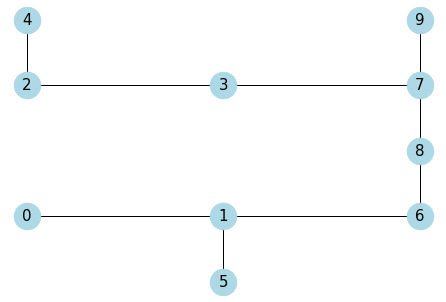

In [28]:
graficar_red(grafo1,15,700)

In [29]:
matriz = leer_datos("mapa_2.txt")
Nodo._id = 0
grafo2 = crear_grafo(matriz)
for nodo in grafo2.values():
    print(nodo)

Nodo: (0, 1) Vecinos: [(1, 1)]
Nodo: (1, 1) Vecinos: [(0, 1), (1, 0), (2, 1)]
Nodo: (0, 3) Vecinos: [(1, 3), (0, 4)]
Nodo: (1, 3) Vecinos: [(0, 3), (2, 3)]
Nodo: (0, 4) Vecinos: [(0, 3)]
Nodo: (0, 6) Vecinos: [(1, 6), (0, 7)]
Nodo: (1, 6) Vecinos: [(0, 6), (1, 5), (1, 7)]
Nodo: (0, 7) Vecinos: [(0, 6), (1, 7)]
Nodo: (1, 7) Vecinos: [(0, 7), (1, 6), (2, 7), (1, 8)]
Nodo: (0, 9) Vecinos: [(1, 9)]
Nodo: (1, 9) Vecinos: [(0, 9), (1, 8), (2, 9)]
Nodo: (1, 0) Vecinos: [(1, 1)]
Nodo: (2, 1) Vecinos: [(1, 1), (2, 2)]
Nodo: (2, 3) Vecinos: [(1, 3), (2, 2), (3, 3), (2, 4)]
Nodo: (1, 5) Vecinos: [(2, 5), (1, 6)]
Nodo: (2, 5) Vecinos: [(1, 5), (2, 4), (3, 5)]
Nodo: (2, 7) Vecinos: [(1, 7), (2, 8)]
Nodo: (1, 8) Vecinos: [(1, 7), (2, 8), (1, 9)]
Nodo: (2, 8) Vecinos: [(1, 8), (2, 7), (2, 9)]
Nodo: (2, 9) Vecinos: [(1, 9), (2, 8)]
Nodo: (2, 2) Vecinos: [(2, 1), (3, 2), (2, 3)]
Nodo: (3, 2) Vecinos: [(2, 2), (3, 3)]
Nodo: (3, 3) Vecinos: [(2, 3), (3, 2), (4, 3)]
Nodo: (2, 4) Vecinos: [(2, 3), (2, 5)]


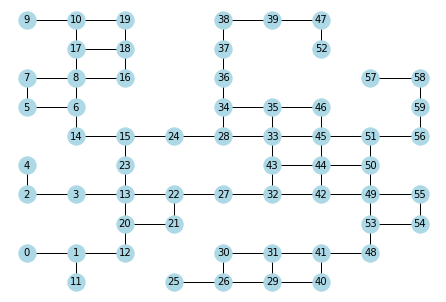

In [30]:
graficar_red(grafo2, 10, 300)

A pesar de que con lo anterior debieran tener la capacidad de generar sus propios grafos a su gusto, a continuación tienen un ejemplo que también les podría resultar interesante.

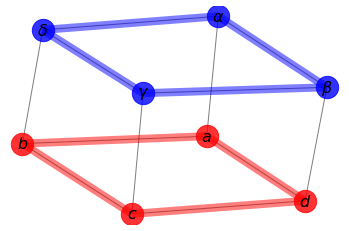

In [31]:
# Author: Aric Hagberg (hagberg@lanl.gov)
# link: https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html

G = nx.cubical_graph()
pos = nx.spring_layout(G) 

# generando nodos
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0, 1, 2, 3],
                       node_color='r', # color rojo
                       node_size=500,
                       alpha=0.8) # el alpha es la transparencia
nx.draw_networkx_nodes(G, pos,
                       nodelist=[4, 5, 6, 7],
                       node_color='b', # color azul
                       node_size=500,
                       alpha=0.8)

# generando arcos
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5) #esto genera los arcos 'normales'
nx.draw_networkx_edges(G, pos, edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)], width=8, alpha=0.5, edge_color='r') #borde rojo
nx.draw_networkx_edges(G, pos, edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)], width=8, alpha=0.5, edge_color='b') #borde azul


# Acá le cambiamos los nombres a los nodos
labels = {}
labels[0] = r'$a$' #cursivas
labels[1] = r'$b$'
labels[2] = r'$c$'
labels[3] = r'$d$'
labels[4] = r'$\alpha$'
labels[5] = r'$\beta$'
labels[6] = r'$\gamma$'
labels[7] = r'$\delta$'
nx.draw_networkx_labels(G, pos, labels, font_size=16)

plt.axis('off')
plt.show()

Ahora vamos a ver como hacer gráficos con matplotlib

In [32]:
from math import exp

Text(0, 0.5, 'Eje y')

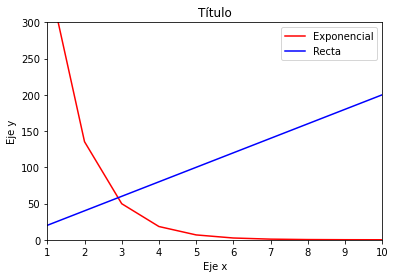

In [33]:
plt.plot([i for i in range(1,40)], [1000/exp(i) for i in range(1,40)], label = "Exponencial", c="red")
plt.plot([i for i in range(1,40)], [20*i for i in range(1,40)], label = "Recta" , c="blue")
plt.legend()
plt.axis([1, 10, 0, 300])
plt.title("Título")
plt.xlabel("Eje x")
plt.ylabel("Eje y")

### Gráficos en 3D

Esta función se ocupa para calcular la distancia euclidiana entre dos puntos

In [34]:
def distancia(pos1, pos2):
    """
    distancia -- calcula distancia entre dos posiciones (de nodos) 
    Parámetros: 
        - pos1, pos2: tupla de posiciones (x,y)
    Retorna distancia entre dos puntos
    """
    x1 = pos1[0]
    y1 = pos1[1]
    x2 = pos2[0]
    y2 = pos2[1]
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

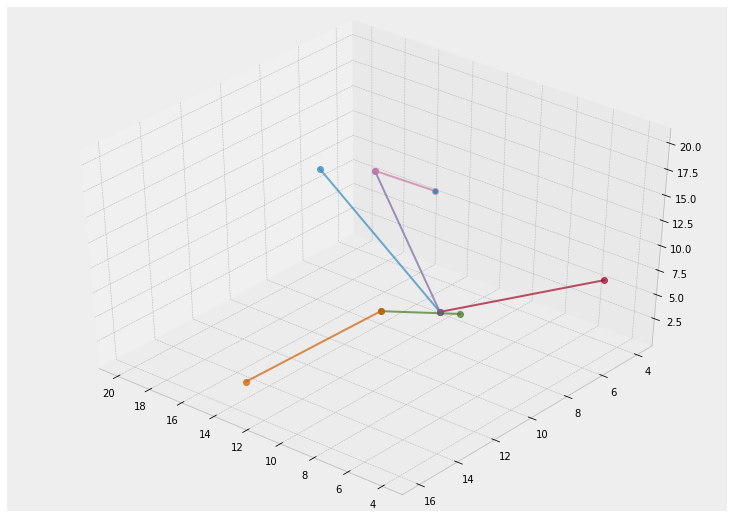

In [35]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from random import randint, seed, random

# Author: Sebastián barriga

seed(123)
n = 10
nodos = dict()
arcos = dict()
for i in range(n):
    nodos[i] = (randint(0,20), randint(0,20), randint(0,20))
for i in nodos:
    for j in nodos:
        if i < j:
            arcos[(i,j)] = distancia(nodos[i], nodos[j])

G = nx.Graph() #grafo no dirigido
posiciones = {}
for nodo in nodos:
    G.add_node(nodo, pos=nodos[nodo])
    pos = nodos[nodo]
    pos = np.asarray(pos)
    posiciones[nodo] = pos

for arco in arcos:
    if random() < 0.2:
        G.add_edge(arco[0], arco[1], weight=arcos[arco])

with plt.style.context("bmh"): #estilo del gráfico: por ejemplo probar 'dark_background'
    fig = plt.figure("Grafo", figsize=(10, 7)) #Genera una figura
    ax = Axes3D(fig) #genera un eje
    for key, value in posiciones.items():
        xi = value[0]
        yi = value[1]
        zi = value[2]

    ax.scatter3D(xi, yi, zi) #nodos: los plotea en un gráfico de dispersión
    for i, j in enumerate(G.edges()): #i es el id, j es la tupla del arco
        cola = j[0]
        cabeza = j[1]
        x = np.array((posiciones[cola][0], posiciones[cabeza][0])) #me entrega las coordenadas de cola y cabeza del eje x
        y = np.array((posiciones[cola][1], posiciones[cabeza][1]))
        z = np.array((posiciones[cola][2], posiciones[cabeza][2])) 
        ax.plot(x,y,z, alpha=0.7, marker='o') #agregando c='#1f77b4' serán todos azules
ax.view_init(40, 130) #Es el ángulo en el que se muestra el gráfico: si están desde un editor, podrán girarlo 
plt.show()